In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.mlab as mlab
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [2]:
file_path = r"ibm.xlsx"
df = pd.read_excel(file_path, index_col = 'date', parse_dates = True)
close = df[['4. close']]
close

,4. close
date,
2020-05-05,122.58
2020-05-06,123.17
2020-05-07,121.23
2020-05-08,122.99
2020-05-11,122.59
...,...
2020-09-18,122.76
2020-09-21,120.25
2020-09-22,120.51


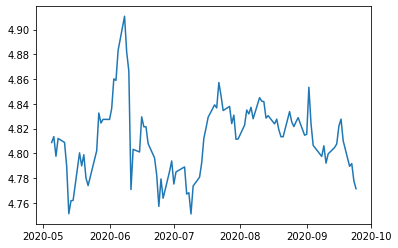

In [3]:
lnclose = np.log(close)
lnclose
plt.plot(lnclose)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


<Figure size 4320x720 with 0 Axes>

<Figure size 4320x720 with 0 Axes>

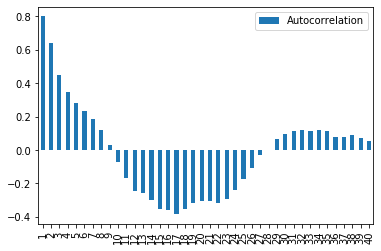

In [4]:
plt.figure(figsize = (60,10))
a = acf(lnclose)[1:100]
test_df = pd.DataFrame([a]).T

test_df.columns = ['Autocorrelation']
plt.figure(figsize = (60,10))
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

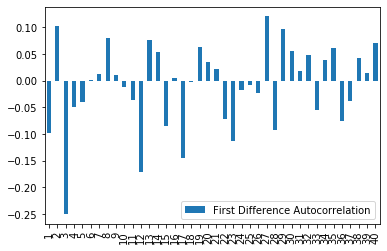

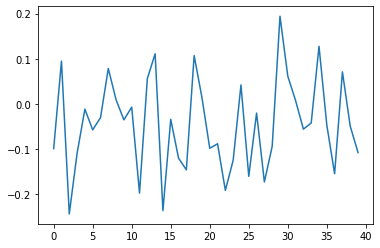

In [5]:
result = ts.adfuller(lnclose, 1)
result
lnclose_diff = lnclose-lnclose.shift()
diff = lnclose_diff.dropna()
a_diff = acf(diff)[1:100]
test_df = pd.DataFrame([a_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
p_diff = pacf(diff)[1:100]
plt.figure()
plt.plot(p_diff)
plt.show()

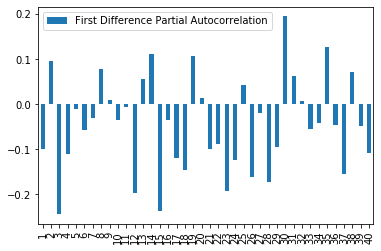

In [6]:
test_df = pd.DataFrame([p_diff]).T
test_df.columns = ['First Difference Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

predicted=118.044646
predicted=117.999293
predicted=117.953939
predicted=117.908586
predicted=117.863232
predicted=117.817879
predicted=117.772525
predicted=117.727172
predicted=117.681818
predicted=117.636465


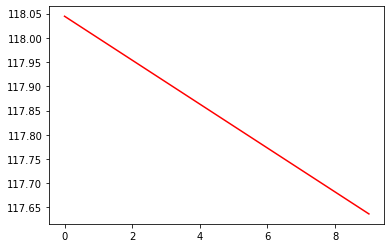

In [7]:
X = close.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.plot(predictions, color='red')
plt.show()

predicted=118.044646
predicted=117.999293
predicted=117.953939
predicted=117.908586
predicted=117.863232
predicted=117.817879
predicted=117.772525
predicted=117.727172
predicted=117.681818
predicted=117.636465


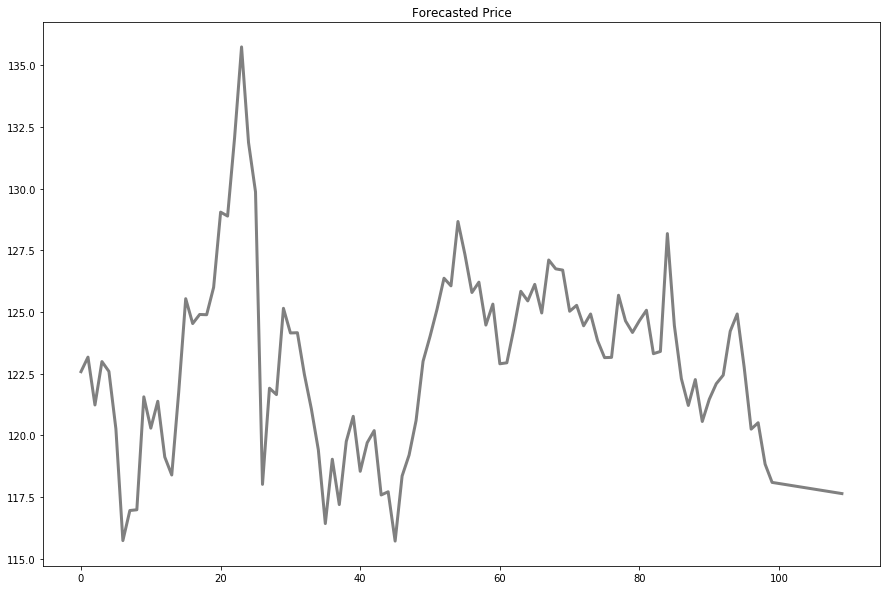

In [9]:
X = close.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'grey', lw = 3)
plt.title('Forecasted Price')
plt.show()

In [10]:
# open
opening = df[['1. open']]
# high
high = df[['2. high']]
# low
low = df[['3. low']]

predicted=118.046566
predicted=117.993131
predicted=117.939697
predicted=117.886263
predicted=117.832828
predicted=117.779394
predicted=117.725960
predicted=117.672525
predicted=117.619091
predicted=117.565657


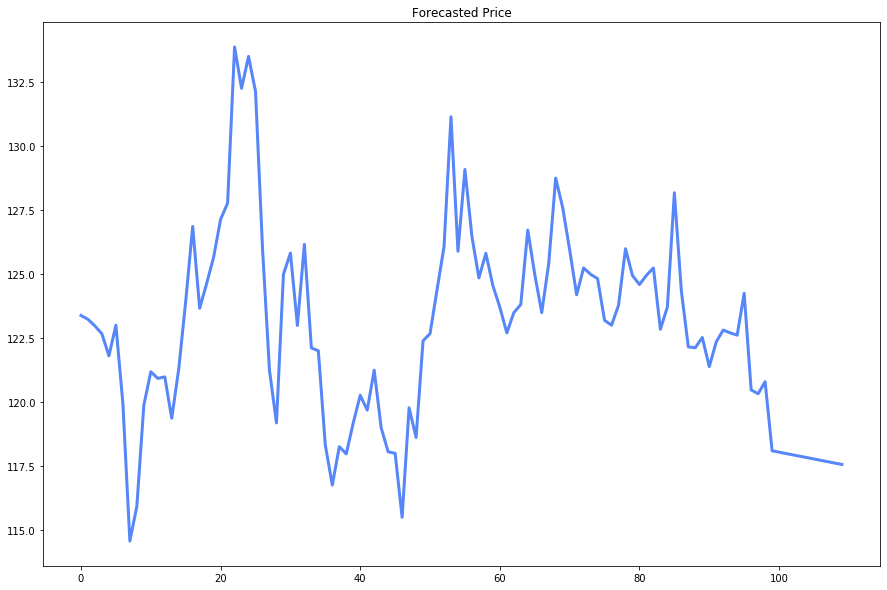

In [11]:
X = opening.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = '#5786f8', lw = 3)
plt.title('Forecasted Price')
plt.show()

predicted=119.466465
predicted=119.417929
predicted=119.369394
predicted=119.320859
predicted=119.272323
predicted=119.223788
predicted=119.175253
predicted=119.126717
predicted=119.078182
predicted=119.029646


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


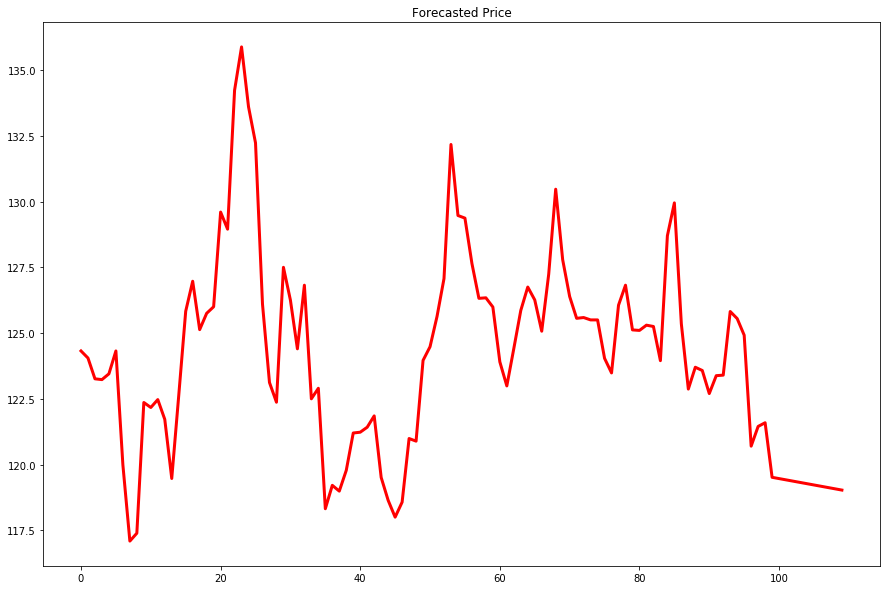

In [12]:
X = high.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'r', lw = 3)
plt.title('Forecasted Price')
plt.show()

predicted=116.419495
predicted=116.358990
predicted=116.298485
predicted=116.237980
predicted=116.177475
predicted=116.116970
predicted=116.056465
predicted=115.995960
predicted=115.935455
predicted=115.874949


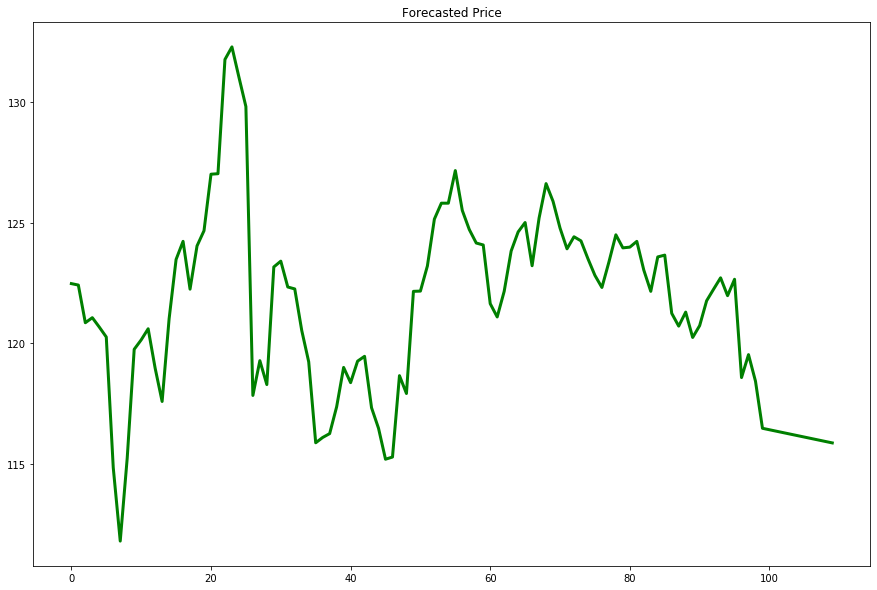

In [13]:
X = low.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'g', lw = 3)
plt.title('Forecasted Price')
plt.show()